## LAB-6
### Name: Harshitha Anishetty
### StudenID: 8903318

1. Using SciKit-Learn, train a logistic regression model on the Iris dataset. Use all four features. Define only 2 labels: `virginica` and `non-virginica`. See the logistic regression notebook presented in class for a demonstration on how to set up these labels (3 points).
2. Provide insights about the model prediction. This is an open-ended part. But you can look into questions such as _in which data instances is the model wrong? are there any shared properties for these cases?_ and _how is the model doing, across a set of _performance metrics_ such as _accuracy_ and _confusion metric_. (3 points)

In [299]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


### Data Extraction

In [300]:

# Load the Iris dataset
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target
X


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [301]:
# description
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [302]:
# Map the target labels to 'virginica' and 'non-virginica'
target_names = iris.target_names
y = np.where(y == 2, 'virginica', 'non-virginica')
target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Data Modelling

In [303]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [304]:
# Mentions the unique value of target either virginica is true or false
np.unique(y)

array(['non-virginica', 'virginica'], dtype='<U13')

In [305]:
# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [306]:
# predictions on the test set
y_pred = model.predict(X_test)
print("The predicted value on the test dataset using logistic regression : \n",y_pred)
print("The test dataset target values : \n",y_test)

The predicted value on the test dataset using logistic regression : 
 ['non-virginica' 'non-virginica' 'virginica' 'non-virginica'
 'non-virginica' 'non-virginica' 'non-virginica' 'virginica'
 'non-virginica' 'non-virginica' 'virginica' 'non-virginica'
 'non-virginica' 'non-virginica' 'non-virginica' 'non-virginica'
 'virginica' 'non-virginica' 'non-virginica' 'virginica' 'non-virginica'
 'virginica' 'non-virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'non-virginica' 'non-virginica']
The test dataset target values : 
 ['non-virginica' 'non-virginica' 'virginica' 'non-virginica'
 'non-virginica' 'non-virginica' 'non-virginica' 'virginica'
 'non-virginica' 'non-virginica' 'virginica' 'non-virginica'
 'non-virginica' 'non-virginica' 'non-virginica' 'non-virginica'
 'virginica' 'non-virginica' 'non-virginica' 'virginica' 'non-virginica'
 'virginica' 'non-virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'non-virginica' 'non-virginica']


### Model Evaluation

In [307]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


### Accuracy = 1.0 indicates that model is 100% accurate. There is no False predictions with this model.

In [308]:
# Create a confusion matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusionMatrix)


Confusion Matrix:
[[19  0]
 [ 0 11]]


### The confusion matrix has no False Positives, no False Negatives. This indicates that the predictions are accurate. 

In [309]:
# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='virginica')
print("Precision:", precision)


Precision: 1.0


### This indicates that out of all predicted positive values, all values are True Positives. This is same as the confusion matrix.

In [310]:
# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='virginica')
print("Recall:", recall)


Recall: 1.0


### Recall = 1 means out of all actual True values, the model predicted 100% correctly.

In [311]:
# Calculate F1-score
f1 = f1_score(y_test, y_pred, pos_label='virginica')
print("F1-Score:", f1)

F1-Score: 1.0


<Axes: >

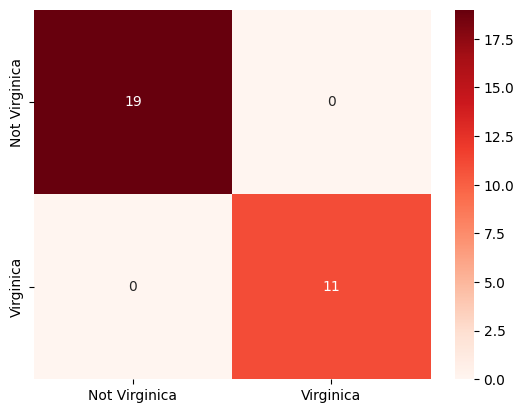

In [312]:
# Define class labels
class_labels = ["Not Virginica", "Virginica"]

# Create heatmap
sns.heatmap(confusionMatrix, annot=True, cmap="Reds", fmt="d",
            xticklabels=class_labels, yticklabels=class_labels)
